In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("Losses.xlsx")

In [3]:
data

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
0,1.0,January,1.0,1999.0,WINDSTORM,477.88
1,1.0,January,1.0,1999.0,FIRE,700.00
2,1.0,January,1.0,1999.0,WINDSTORM,99.87
3,1.0,January,1.0,1999.0,WINDSTORM,139.80
4,1.0,January,1.0,1999.0,WINDSTORM,548.66
...,...,...,...,...,...,...
47560,28.0,December,12.0,2007.0,FLOOD,1051.00
47561,29.0,December,12.0,2007.0,ACCIDENTAL DAMAGE,461.00
47562,29.0,December,12.0,2007.0,FLOOD,1051.00
47563,29.0,December,12.0,2007.0,FLOOD,1051.00


### Q1. What are the total claims by year and what trends are there? What could be driving these trends?
a.What are the total value of claims by year?

b.What factors, internal and external to the insurer, could be driving any trends that you have identified?

In [4]:
df=data.groupby(["YEAR"])["GROSS INCURRED AMOUNT"].sum()
df

YEAR
1999.0     1505461.74
2000.0     3337319.82
2001.0     3536859.59
2002.0     3281628.01
2003.0     3137249.46
2004.0     4034545.31
2005.0     6271443.43
2006.0     9892171.66
2007.0    16012815.90
Name: GROSS INCURRED AMOUNT, dtype: float64

### graphical representation

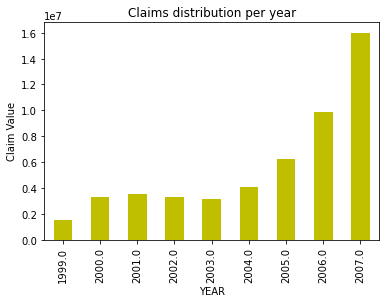

In [5]:
data.groupby(["YEAR"])["GROSS INCURRED AMOUNT"].sum().plot(kind="bar",color="y")

plt.ylabel("Claim Value")
plt.title("Claims distribution per year")
plt.show()

# PIE CHART

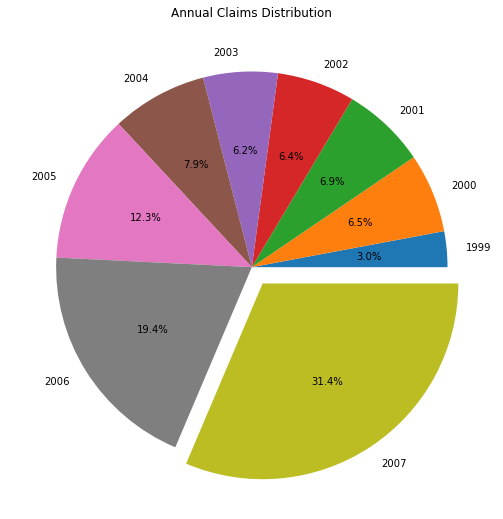

In [6]:
plt.figure(figsize=(9,9))
plt.title("Annual Claims Distribution")
plt.pie(x=data.groupby(["YEAR"])["GROSS INCURRED AMOUNT"].sum(),explode=[0,0,0,0, 0, 0, 0,0, 0.1],labels=[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007],autopct='%.1f%%')
plt.show()

## b.What factors, internal and external to the insurer, could be driving any trends that you have identified?

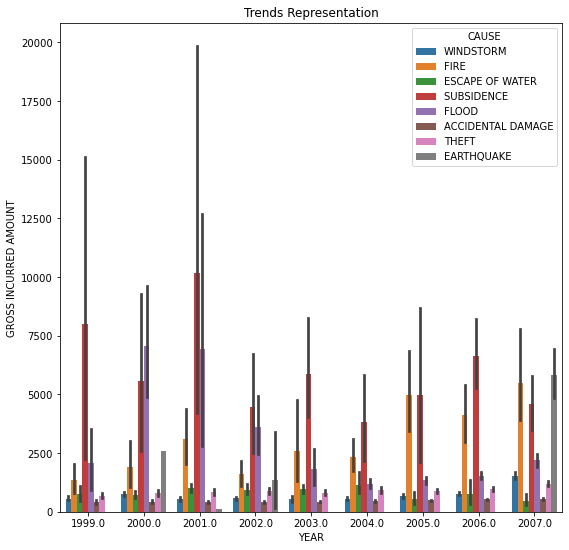

In [7]:
plt.figure(figsize=(9,9))
sns.barplot(x=data["YEAR"],y=data["GROSS INCURRED AMOUNT"],hue=data["CAUSE"])
plt.title("Trends Representation")
plt.show()


# Q2. Which perils should the company worry about most and why?
Which claim types (perils) have the greatest average annual frequency and severity?  


What is the average individual claim size by peril across the 9-year time period?


# Which claim types (perils) have the greatest average annual frequency and severity?

In [8]:
tr=pd.pivot_table(data,index="CAUSE",values="DAY",aggfunc=np.mean)
tr.sort_values(by="DAY",ascending=False)

,DAY
CAUSE,
EARTHQUAKE,26.637681
WINDSTORM,15.953279
THEFT,15.740217
FIRE,15.067937
FLOOD,14.942029
ACCIDENTAL DAMAGE,14.861057
ESCAPE OF WATER,14.576942
SUBSIDENCE,10.625917


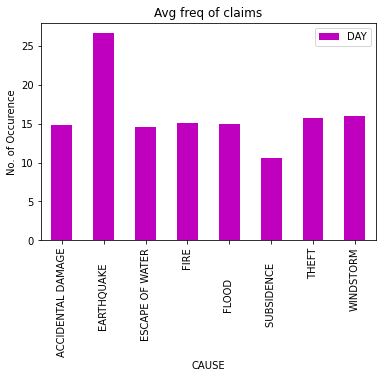

In [9]:
tr.plot(kind="bar",color="m")
plt.title("Avg freq of claims")
plt.ylabel("No. of Occurence")
plt.show()

In [10]:
r=pd.pivot_table(data,index="YEAR",columns="CAUSE",values="GROSS INCURRED AMOUNT",aggfunc=np.mean)
r

CAUSE,ACCIDENTAL DAMAGE,EARTHQUAKE,ESCAPE OF WATER,FIRE,FLOOD,SUBSIDENCE,THEFT,WINDSTORM
YEAR,,,,,,,,
1999.0,404.566161,NaN,760.907003,1353.735536,2088.184138,8000.102683,678.204967,565.783968
2000.0,423.386404,2598.150000,729.334336,1900.907067,7082.943482,5554.991500,798.231008,761.756547
2001.0,424.354394,99.880000,1009.589391,3121.188449,6947.826667,10179.639677,858.521699,557.610832
2002.0,426.508692,1345.550000,948.743508,1598.469831,3624.894091,4457.526389,886.950764,571.398385
2003.0,436.002464,NaN,960.521504,2591.907065,1816.172727,5854.823429,809.945472,542.298650
2004.0,459.439503,NaN,1142.040529,2354.783537,1189.663953,3825.015185,933.841346,552.452375
2005.0,491.899067,NaN,545.001266,4985.420591,1340.569981,4979.457556,884.905879,678.596249
2006.0,525.897488,NaN,759.561528,4112.249971,1537.822033,6656.198037,979.931802,765.867285
2007.0,545.329822,5848.250611,478.052706,5495.726636,2194.451457,4594.211101,1190.247467,1543.921175


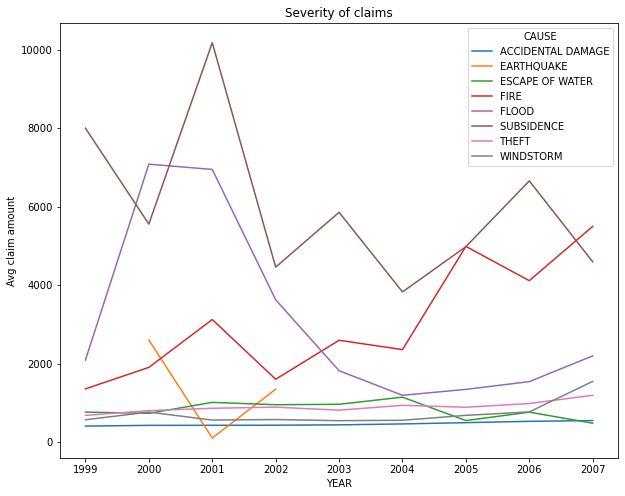

In [11]:
plt.rcParams['figure.figsize'] = [10,8]
r.plot(kind="line")
plt.title("Severity of claims")
plt.ylabel("Avg claim amount")
plt.show()

In [12]:
for i in data["CAUSE"].unique():
    print(i)
    print(data["CAUSE"].isin([i]).mean())

WINDSTORM
0.2074424471775465
FIRE
0.04301482182276884
ESCAPE OF WATER
0.0833385892988542
SUBSIDENCE     
0.017197519184274153
FLOOD          
0.10879848628192999
ACCIDENTAL DAMAGE
0.3782823504677809
THEFT
0.15902449279932723
EARTHQUAKE     
0.002901292967518133


In [13]:
data["CAUSE"].value_counts()

ACCIDENTAL DAMAGE    17993
WINDSTORM             9867
THEFT                 7564
FLOOD                 5175
ESCAPE OF WATER       3964
FIRE                  2046
SUBSIDENCE             818
EARTHQUAKE             138
Name: CAUSE, dtype: int64

## What is the average individual claim size by peril across the 9-year time period?

In [14]:
t=pd.pivot_table(data,index='CAUSE',values="GROSS INCURRED AMOUNT",aggfunc=np.mean)
t.sort_values(by="GROSS INCURRED AMOUNT",ascending=False)

,GROSS INCURRED AMOUNT
CAUSE,
SUBSIDENCE,5839.566308
EARTHQUAKE,5619.902971
FIRE,3446.486818
FLOOD,1855.767451
WINDSTORM,954.365621
THEFT,949.712451
ESCAPE OF WATER,859.540361
ACCIDENTAL DAMAGE,488.773741


<Figure size 936x936 with 0 Axes>

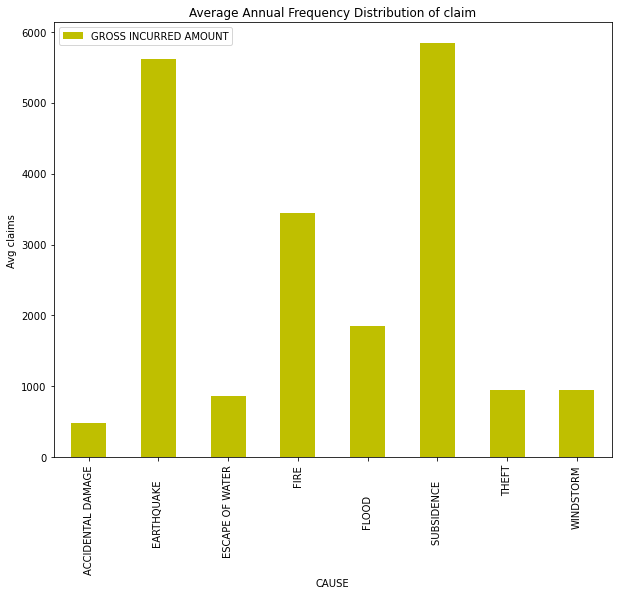

In [15]:
plt.figure(figsize=(13,13))
t.plot(kind="bar",color="y")
plt.title("Average Annual Frequency Distribution of claim")
plt.xlabel("CAUSE")
plt.ylabel("Avg claims")
plt.savefig("Pivot.jpg")

In [16]:
data[(data["CAUSE"]=="WINDSTORM")&(data["MONTH"]=="January")&(data["YEAR"]==2005)&(data["DAY"]>=7)&(data["DAY"]<=9)]

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
20485,7.0,January,1.0,2005.0,WINDSTORM,430.00
20486,7.0,January,1.0,2005.0,WINDSTORM,425.00
20487,7.0,January,1.0,2005.0,WINDSTORM,76.37
20488,7.0,January,1.0,2005.0,WINDSTORM,126.25
20489,7.0,January,1.0,2005.0,WINDSTORM,0.00
...,...,...,...,...,...,...
20958,9.0,January,1.0,2005.0,WINDSTORM,270.00
20959,9.0,January,1.0,2005.0,WINDSTORM,525.75
20960,9.0,January,1.0,2005.0,WINDSTORM,300.00
20961,9.0,January,1.0,2005.0,WINDSTORM,225.00


### Q3. What did Windstorm Erwin cost the company? What perils drove the loss?
What was the total loss, for windstorm and other related weather perils, for Windstorm Erwin (date Jan 7th to Jan 9th, 2005)


In [17]:
cause=data["CAUSE"].unique()
p=[]
for i in cause:
    if i!="WINDSTORM":
        p.append(data[(data["CAUSE"]==i)]["GROSS INCURRED AMOUNT"].sum())
    else:
         p.append(data[(data["CAUSE"]==i)&(data["MONTH"]=="January")&(data["YEAR"]==2005)&(data["DAY"]>=7)&(data["DAY"]<=9)]["GROSS INCURRED AMOUNT"].sum())
g={'cause':cause,'total loss':p}
data1=pd.DataFrame(g)
data1
data2=data1.iloc[[0,4,7],:]
data3=data2.set_index("cause")
data3.sort_values(by="total loss",ascending=False)


,total loss
cause,
FLOOD,9603596.56
EARTHQUAKE,775546.61
WINDSTORM,292229.86


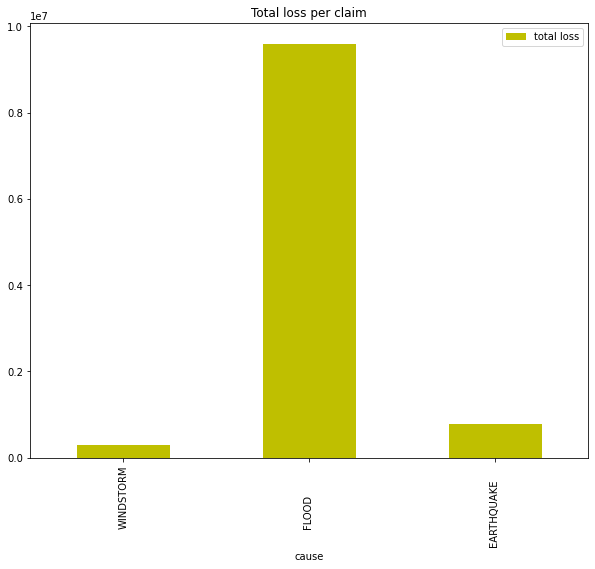

In [18]:
data3.plot(kind="bar",color="y")
plt.title("Total loss per claim")
plt.show()

In [19]:
data["CAUSE"].unique()

array(['WINDSTORM', 'FIRE', 'ESCAPE OF WATER', 'SUBSIDENCE     ',
       'FLOOD          ', 'ACCIDENTAL DAMAGE', 'THEFT', 'EARTHQUAKE     '],
      dtype=object)

In [20]:
x=data[["DAY","MONTH_ID","YEAR","GROSS INCURRED AMOUNT"]]

In [21]:
x

,DAY,MONTH_ID,YEAR,GROSS INCURRED AMOUNT
0,1.0,1.0,1999.0,477.88
1,1.0,1.0,1999.0,700.00
2,1.0,1.0,1999.0,99.87
3,1.0,1.0,1999.0,139.80
4,1.0,1.0,1999.0,548.66
...,...,...,...,...
47560,28.0,12.0,2007.0,1051.00
47561,29.0,12.0,2007.0,461.00
47562,29.0,12.0,2007.0,1051.00
47563,29.0,12.0,2007.0,1051.00


In [22]:
y=data[["CAUSE"]]

In [23]:
y

,CAUSE
0,WINDSTORM
1,FIRE
2,WINDSTORM
3,WINDSTORM
4,WINDSTORM
...,...
47560,FLOOD
47561,ACCIDENTAL DAMAGE
47562,FLOOD
47563,FLOOD


In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=319)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
gb=GradientBoostingClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xg=XGBClassifier()

In [26]:
from sklearn.metrics import classification_report
def my_model(model):
    model.fit(xtrain,ytrain)
    y_pred_train=model.predict(xtrain)
    y_pred_test=model.predict(xtest)
    print('Train Data')
    print(classification_report(ytrain,y_pred_train))
    print('-'*30)
    print('Test Data')
    print(classification_report(ytest,y_pred_test))

    return model

In [27]:
my_model(rf)

Train Data
                   precision    recall  f1-score   support

ACCIDENTAL DAMAGE       0.95      0.98      0.96     14422
  EARTHQUAKE            0.98      0.99      0.99       107
  ESCAPE OF WATER       0.96      0.93      0.94      3151
             FIRE       0.97      0.91      0.94      1651
  FLOOD                 0.97      0.95      0.96      4124
  SUBSIDENCE            0.92      0.91      0.91       667
            THEFT       0.97      0.96      0.96      6025
        WINDSTORM       0.96      0.96      0.96      7905

         accuracy                           0.96     38052
        macro avg       0.96      0.95      0.95     38052
     weighted avg       0.96      0.96      0.96     38052

------------------------------
Test Data
                   precision    recall  f1-score   support

ACCIDENTAL DAMAGE       0.49      0.63      0.55      3571
  EARTHQUAKE            0.81      0.68      0.74        31
  ESCAPE OF WATER       0.23      0.16      0.19       813


RandomForestClassifier()

In [28]:
my_model(dt)

Train Data
                   precision    recall  f1-score   support

ACCIDENTAL DAMAGE       0.93      0.99      0.96     14422
  EARTHQUAKE            0.98      0.99      0.99       107
  ESCAPE OF WATER       0.96      0.93      0.95      3151
             FIRE       0.96      0.92      0.94      1651
  FLOOD                 0.97      0.94      0.96      4124
  SUBSIDENCE            0.95      0.88      0.91       667
            THEFT       0.99      0.94      0.96      6025
        WINDSTORM       0.98      0.95      0.96      7905

         accuracy                           0.96     38052
        macro avg       0.97      0.94      0.95     38052
     weighted avg       0.96      0.96      0.96     38052

------------------------------
Test Data
                   precision    recall  f1-score   support

ACCIDENTAL DAMAGE       0.47      0.49      0.48      3571
  EARTHQUAKE            0.62      0.68      0.65        31
  ESCAPE OF WATER       0.19      0.18      0.18       813


DecisionTreeClassifier()

In [29]:
my_model(gb)

Train Data
                   precision    recall  f1-score   support

ACCIDENTAL DAMAGE       0.48      0.88      0.62     14422
  EARTHQUAKE            0.82      0.86      0.84       107
  ESCAPE OF WATER       0.39      0.05      0.09      3151
             FIRE       0.73      0.08      0.14      1651
  FLOOD                 0.45      0.30      0.36      4124
  SUBSIDENCE            0.78      0.34      0.48       667
            THEFT       0.43      0.09      0.15      6025
        WINDSTORM       0.63      0.52      0.57      7905

         accuracy                           0.50     38052
        macro avg       0.59      0.39      0.41     38052
     weighted avg       0.51      0.50      0.44     38052

------------------------------
Test Data
                   precision    recall  f1-score   support

ACCIDENTAL DAMAGE       0.47      0.88      0.62      3571
  EARTHQUAKE            0.70      0.74      0.72        31
  ESCAPE OF WATER       0.29      0.04      0.07       813


GradientBoostingClassifier()

In [30]:
def predict():
     day=int(input('Enter the day: '))
     month_id=float(input('Enter The Month: '))
     year=int(input('Enter the Year: ' ))
     amount=int(input('Enter the amount of money claimed: '))
     newobs=[[day,month_id,year,amount]]
     ypred=gb.predict(newobs)[0]
     return ypred

In [32]:
predict()

Enter the day: 9
Enter The Month: 1
Enter the Year: 2005
Enter the amount of money claimed: 256


'WINDSTORM'